In [46]:
# Importing Praw

import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="GpV40zz2EDeH9lj2fwouFA",
    client_secret="MctonRYFTONfkYtKqyE3ZtQ9emHvng",
    user_agent=user_agent
)

In [47]:
# Importing requyired libraries

import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [48]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("gaming").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Self Promotion Saturday! Small streamer? Just getting started? Tell us about it here!
1daw1dy
AutoModerator
1717826409.0
3
0.57
https://www.reddit.com/r/gaming/comments/1daw1dy/self_promotion_saturday_small_streamer_just/
0


In [49]:
headlines = set()
for submission in reddit.subreddit("gaming").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

171


In [50]:
#Create a dataframe from the scrapped data 

game_df = pd.DataFrame(headlines)
game_df.head()


,0
0,Rectifying Cyberpunk 2077's Disastrous Launch ...
1,"Lego Horizon Adventures Announced for PS5, PC..."
2,What are some hidden gems more people should k...
3,Wildfrost - A Hidden Masterpiece
4,What are some games with good karma systems?


In [51]:
game_df.columns

RangeIndex(start=0, stop=1, step=1)

In [52]:
game_df.columns = ['Titles']

In [53]:
game_df.head()

,Titles
0,Rectifying Cyberpunk 2077's Disastrous Launch ...
1,"Lego Horizon Adventures Announced for PS5, PC..."
2,What are some hidden gems more people should k...
3,Wildfrost - A Hidden Masterpiece
4,What are some games with good karma systems?


In [54]:
game_df.Titles.duplicated().sum() 

0

In [55]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
tech_df["Titles"]= tech_df["Titles"].apply(cleanTxt)

#Show the clean text
tech_df.head()

,Titles,Subjectivity,Polarity,Insight
0,Rectifying Cyberpunk 2077's Disastrous Launch ...,0.400000,-0.350000,Negative
1,"Lego Horizon Adventures Announced for PS5, PC...",0.000000,0.000000,Neutral
2,What are some hidden gems more people should k...,0.416667,0.166667,Positive
3,Wildfrost - A Hidden Masterpiece,0.333333,-0.166667,Negative
4,What are some games with good karma systems?,0.600000,0.700000,Positive


In [56]:
#Next we have to remove emoji & Unicode from the reddit data.

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
game_df["Titles"]= tech_df["Titles"].apply(remove_emoji)

#Show the clean text
game_df.head()

,Titles
0,Rectifying Cyberpunk 2077's Disastrous Launch ...
1,"Lego Horizon Adventures Announced for PS5, PC..."
2,What are some hidden gems more people should k...
3,Wildfrost - A Hidden Masterpiece
4,What are some games with good karma systems?


In [57]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [58]:
#Create a function to get the subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
game_df['Subjectivity'] = game_df['Titles'].apply(getSubjectivity)
game_df['Polarity'] = game_df['Titles'].apply(getPolarity)

#Now display data
game_df.head()

,Titles,Subjectivity,Polarity
0,Rectifying Cyberpunk 2077's Disastrous Launch ...,0.400000,-0.350000
1,"Lego Horizon Adventures Announced for PS5, PC...",0.000000,0.000000
2,What are some hidden gems more people should k...,0.416667,0.166667
3,Wildfrost - A Hidden Masterpiece,0.333333,-0.166667
4,What are some games with good karma systems?,0.600000,0.700000


In [59]:
#Group the range of Polarity to different categories

def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
game_df["Insight"] = game_df["Polarity"].apply(getInsight)

game_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Rectifying Cyberpunk 2077's Disastrous Launch ...,0.400000,-0.350000,Negative
1,"Lego Horizon Adventures Announced for PS5, PC...",0.000000,0.000000,Neutral
2,What are some hidden gems more people should k...,0.416667,0.166667,Positive
3,Wildfrost - A Hidden Masterpiece,0.333333,-0.166667,Negative
4,What are some games with good karma systems?,0.600000,0.700000,Positive
5,What are your expectations for tomorrow's Micr...,0.000000,0.000000,Neutral
6,Iron Giant player has character removed from g...,0.700000,-0.200000,Negative
7,What's the most chaotic game in your opinion?,0.450000,0.050000,Positive
8,"Chromatic aberration, lens distortion, depth o...",0.833333,0.183333,Positive
9,Prince of Persia the lost crown is genuinely a...,0.650000,0.000000,Neutral


In [60]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Data Visualization

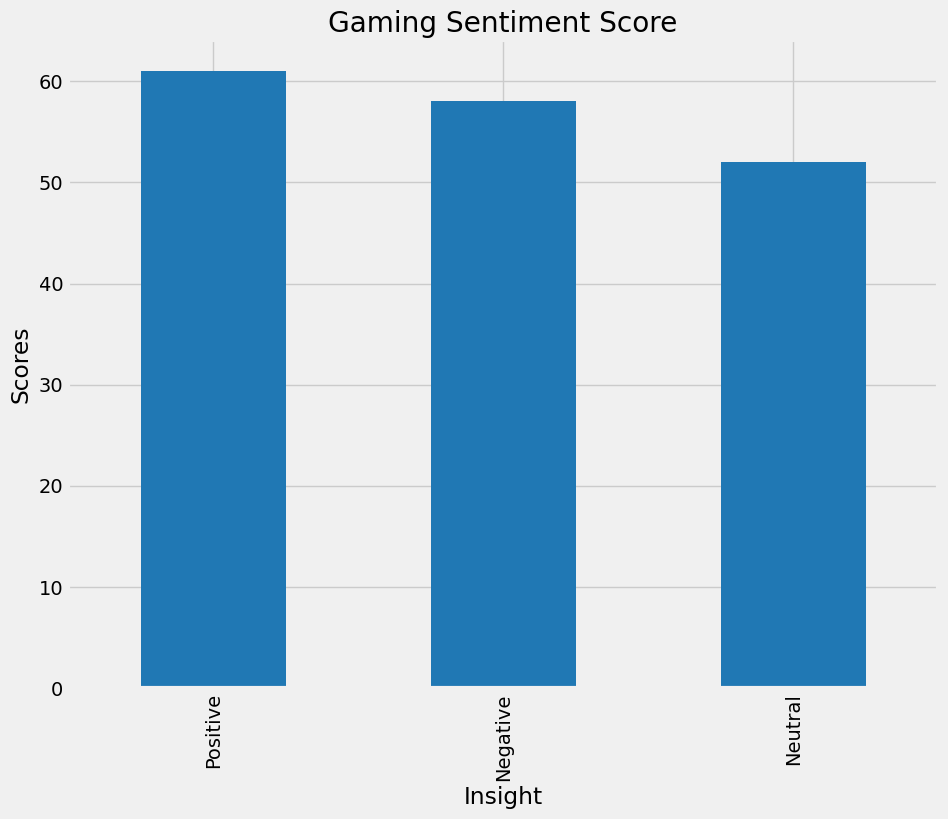

In [61]:
#Plot the values count of sentiment

plt.title("Gaming Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
game_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()


# Wordcloud

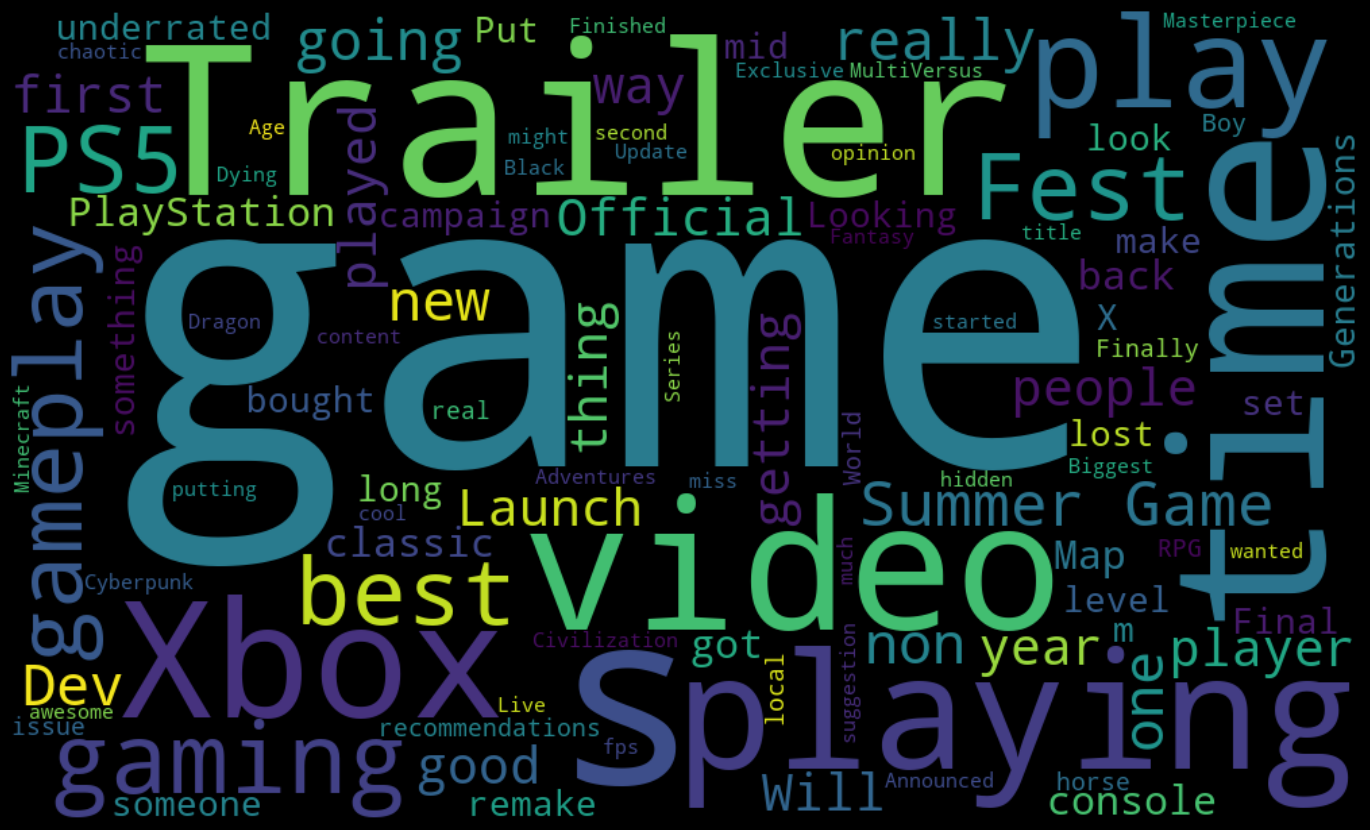

In [62]:
text = ' '.join( [twts for twts in tech_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");